In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
import sqlalchemy as sqla
import datetime as dt

In [4]:
db = sqla.create_engine('sqlite:///zillow.db')

In [7]:
df = pd.read_sql('SELECT * FROM zillow', db)
df

,Bedrooms,RegionName,Date,Price
0,0,Memphis,1996-01-31,75490
1,0,Memphis,1996-02-29,75633
2,0,Memphis,1996-03-31,75801
3,0,Memphis,1996-04-30,76142
4,0,Memphis,1996-05-31,76524
...,...,...,...,...
642976,5,Braden,2019-11-30,266558
642977,5,Braden,2019-12-31,269833
642978,5,Braden,2020-01-31,271472
642979,5,Braden,2020-02-29,276641


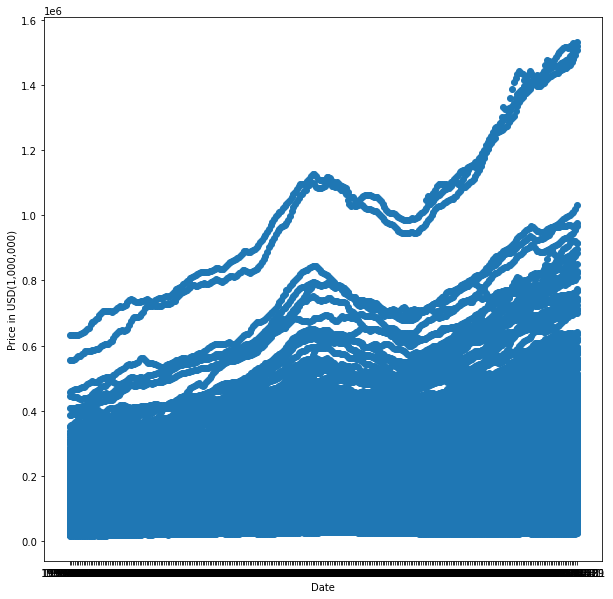

In [8]:
# First review the data
plt.scatter(df.Date, df.Price)
plt.xlabel('Date')
plt.ylabel('Price in USD(1,000,000)')
plt.gcf().set_size_inches((10, 10))  
plt.show()

In [9]:
df.Bedrooms.value_counts()

0    146624
3    137098
2    120286
4    117546
5     80417
1     41010
Name: Bedrooms, dtype: int64

<AxesSubplot:ylabel='Density'>

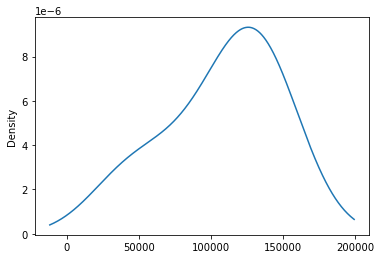

In [10]:
df_counts = df.Bedrooms.value_counts()
df_counts.plot.density()

In [12]:
df[df["Date"]>="2018-01-01"]

,Bedrooms,RegionName,Date,Price
264,0,Memphis,2018-01-31,80965
265,0,Memphis,2018-02-28,81315
266,0,Memphis,2018-03-31,81527
267,0,Memphis,2018-04-30,82088
268,0,Memphis,2018-05-31,82712
...,...,...,...,...
642976,5,Braden,2019-11-30,266558
642977,5,Braden,2019-12-31,269833
642978,5,Braden,2020-01-31,271472
642979,5,Braden,2020-02-29,276641


In [13]:
# Create an Encoder instance
enc = OrdinalEncoder()
X_df = df.drop(["Price"],axis=1)
X_enc = enc.fit_transform(X_df)
X_df_enc = pd.DataFrame(X_enc)
X_df_enc

,0,1,2
0,0.0,302.0,0.0
1,0.0,302.0,1.0
2,0.0,302.0,2.0
3,0.0,302.0,3.0
4,0.0,302.0,4.0
...,...,...,...
642976,5.0,47.0,286.0
642977,5.0,47.0,287.0
642978,5.0,47.0,288.0
642979,5.0,47.0,289.0


In [14]:
X_train = X_df_enc[X_df_enc[2]<264]
y_train = df.iloc[X_train.index]["Price"]
X_test = X_df_enc[X_df_enc[2]>=264]
y_test = df.iloc[X_test.index]["Price"]

In [15]:
# Create an instance of linear regression model. INSTANTIATION
model = RandomForestRegressor()

model.fit(X_train, y_train)


RandomForestRegressor()

In [16]:
# Predict() method is used to generate a prediciton
y_pred = model.predict(X_test)
print(y_pred.shape)

(70279,)


In [17]:
X_test_inverse=pd.DataFrame(enc.inverse_transform(X_test))

In [18]:
X_test_inverse["Price Predictions"]=y_pred
X_test_inverse

,0,1,2,Price Predictions
0,0,Memphis,2018-01-31,80374.71
1,0,Memphis,2018-02-28,80374.71
2,0,Memphis,2018-03-31,80374.71
3,0,Memphis,2018-04-30,80374.71
4,0,Memphis,2018-05-31,80374.71
...,...,...,...,...
70274,5,Braden,2019-11-30,244808.53
70275,5,Braden,2019-12-31,244808.53
70276,5,Braden,2020-01-31,244808.53
70277,5,Braden,2020-02-29,244808.53


In [19]:
y_test

264        80965
265        81315
266        81527
267        82088
268        82712
           ...  
642976    266558
642977    269833
642978    271472
642979    276641
642980    281210
Name: Price, Length: 70279, dtype: int64

In [23]:
X_test_inverse["Actual Price"]=y_test.values
X_test_inverse.head(50)

,0,1,2,Price Predictions,Actual Price,Difference
0,0,Memphis,2018-01-31,80374.71,80965,-590.29
1,0,Memphis,2018-02-28,80374.71,81315,-940.29
2,0,Memphis,2018-03-31,80374.71,81527,-1152.29
3,0,Memphis,2018-04-30,80374.71,82088,-1713.29
4,0,Memphis,2018-05-31,80374.71,82712,-2337.29
5,0,Memphis,2018-06-30,80374.71,83605,-3230.29
6,0,Memphis,2018-07-31,80374.71,84310,-3935.29
7,0,Memphis,2018-08-31,80374.71,84859,-4484.29
8,0,Memphis,2018-09-30,80374.71,85550,-5175.29
9,0,Memphis,2018-10-31,80374.71,86212,-5837.29


In [21]:
X_test_inverse["Difference"]=X_test_inverse["Price Predictions"]-X_test_inverse["Actual Price"]
Average=X_test_inverse["Difference"].values.mean()
Average

-10652.95322343801

In [ ]:
#import joblib
#joblib.dump(model,"Trained_Random_Forest_Regression_Model.joblib")